### importamos librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Abstrapção del perceptron

In [22]:
class Perceptron():
    w = [] # Pesos
    b = 0 # Bias

    def __init__(self, description = ""):
        self.description = description

    def __repr__(self) -> str:
        return f"Perceptron({self.description})"

    def hardlim(self, x) -> int:
        return 1 if x >= 0 else 0

    def eval_error(self, error ) -> int:
        return np.absolute( error ).sum()

    def train( self, matrix_in, vector_out, epoch_max = 10):
        # supervisado por salidas esperadas
        self.X = matrix_in = np.array(matrix_in)
        self.Y = vector_out = np.array(vector_out)

        # inicializacion aleatoria
        error = np.ones( vector_out.size )
        self.w = np.random.rand( matrix_in.shape[-1], 1)
        self.b = np.random.rand()
        self.epoch = 0

        # algoritmo de perceptron iterativo
        while self.eval_error( error ): # hasta que el error sea 0
            for index, patter in enumerate( matrix_in ):
                calc_out = self.hardlim( patter@self.w + self.b )
                error[index] = vector_out[index] - calc_out
                self.w = self.w + error[index]*patter.reshape( len(patter) ,1)
                self.b = self.b + error[index]
            self.epoch += 1


            if self.epoch == epoch_max:
                print("Insufficient dimensionss")
                return self.epoch

        print("Solution found. Epoch", self.epoch)
        return self.epoch

    def test(self, input: list):
        input = np.array(input)
        return self.hardlim( input@self.w + self.b )


    def graph( self ):
        if ( self.epoch > 0 ):
            plt.scatter( self.X[self.Y == 0,0] , self.X[self.Y == 0,1], c="blue")
            plt.scatter( self.X[self.Y == 1,0] , self.X[self.Y == 1,1], c="salmon")
            p1 = np.linspace( self.X.min() - 1, self.X.max() + 1, 10 )
            p2 = -(self.w[0]/self.w[1])*p1 -self.b/self.w[1];
            plt.plot(p1,p2)
            plt.axis('equal')
            plt.xlim([self.X.min() - 1, self.X.max() + 1])
            plt.ylim([self.X.min() - 1, self.X.max() + 1])
            plt.grid()
            plt.show()


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


Solution found. Epoch 4
Solution found. Epoch 8
1
0


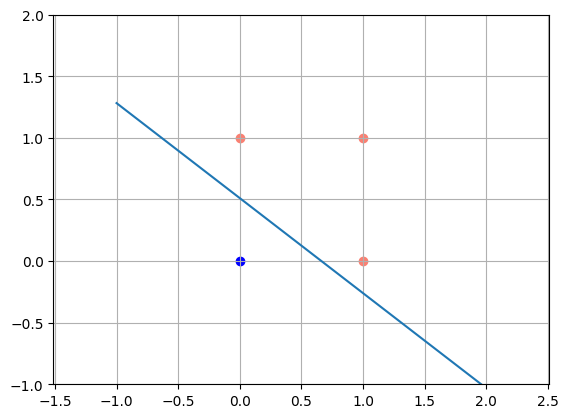

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


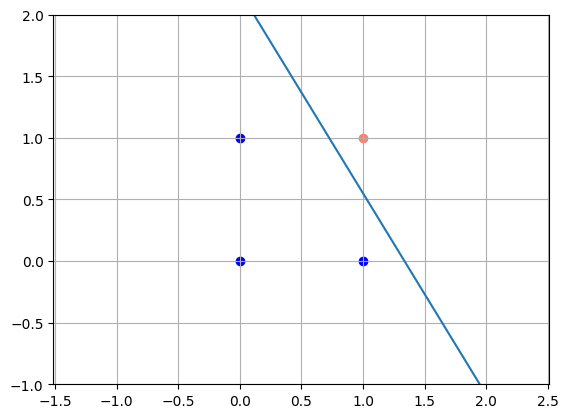

In [39]:
neuron1 = Perceptron() # instancia de la clase
neuron2 = Perceptron()

# Example 1: OR gate
inputs = [[0,0],[0,1],[1,0],[1,1]]
outputXor = [0,1,1,1]
outputAnd = [0,0,0,1]

neuron1.train(inputs, outputXor)
neuron2.train(inputs, outputAnd)

print(neuron1.test([0,1]))
print(neuron2.test([0,1]))

neuron1.graph()
neuron2.graph()

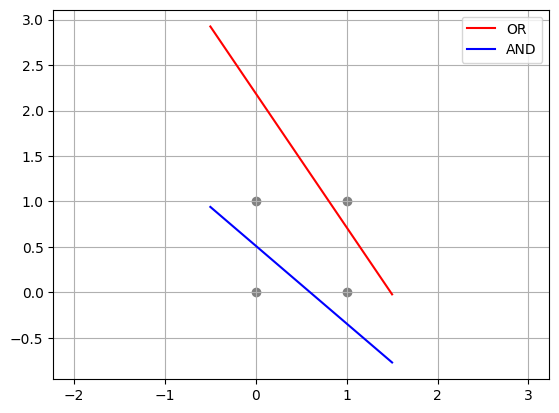

In [42]:
plt.scatter(np.array(inputs)[:,0], np.array(inputs)[:,1], c="gray")

p1 = np.linspace(-0.5, 1.5, 2)
p2 = -(neuron2.w[0]/neuron1.w[1])*p1 - neuron2.b/neuron2.w[1]
plt.plot(p1, p2, label="OR", color="red")

p2 = -(neuron1.w[0]/neuron2.w[1])*p1 - neuron1.b/neuron1.w[1]
plt.plot(p1, p2, label="AND", color="blue")

plt.legend()
plt.axis('equal')
plt.grid()
plt.show()